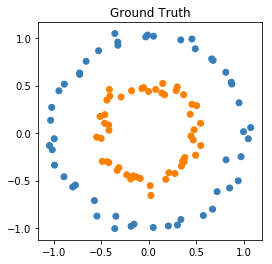

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# create toy datasets for cluster experiments
n_samples = 100
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
datasets = [noisy_circles, noisy_moons]

X, y = datasets[0]

def plot_results(X, y, fignum, title):
    # plot with true labels
    fig = plt.figure(fignum)
    plt.title(title)
    colors = ['#377eb8', '#ff7f00']
    y_colors = [colors[label] for label in y]
    plt.scatter(X[:,0], X[:,1], color=y_colors)
    plt.gca().set_aspect('equal')
    plt.show()
    
plot_results(X, y, 1, "Ground Truth")

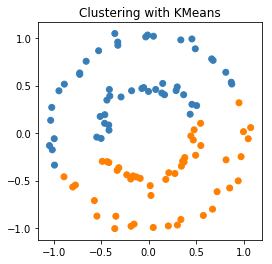

In [2]:
from sklearn.cluster import KMeans

# try clustering with KMeans for comparision
km = KMeans(n_clusters=2)
km.fit(X)
y_pred = km.labels_

# plot results
plot_results(X, y_pred, 2, "Clustering with KMeans")

In [3]:
from numpy.linalg import norm
from math import exp

num_clusters = 2
sigma_sq = .01

def affinity_kernel(x1, x2):
    # compute the affinity of samples X1, X2
    return exp(-(norm(x1-x2)**2)/(2*sigma_sq))

# construct affinity matrix
A = np.zeros((len(X), len(X)))
for i in range(len(X)-1):
    for j in range(i+1, len(X)):
        A[i,j] = affinity_kernel(X[i], X[j])
        A[j,i] = A[i,j]

# print affinity matrix
np.set_printoptions(precision=2)
print(A)

[[  0.00e+00   2.15e-45   2.38e-33 ...,   5.45e-60   1.35e-63   2.03e-21]
 [  2.15e-45   0.00e+00   3.46e-49 ...,   7.21e-41   2.12e-33   2.33e-23]
 [  2.38e-33   3.46e-49   0.00e+00 ...,   3.93e-08   1.08e-12   5.09e-06]
 ..., 
 [  5.45e-60   7.21e-41   3.93e-08 ...,   0.00e+00   1.35e-01   4.51e-11]
 [  1.35e-63   2.12e-33   1.08e-12 ...,   1.35e-01   0.00e+00   3.75e-12]
 [  2.03e-21   2.33e-23   5.09e-06 ...,   4.51e-11   3.75e-12   0.00e+00]]


In [4]:
# Construct diagonal degree matrix
D = np.zeros(A.shape)
for i in range(A.shape[0]):
    D[i,i] = np.sum(A[i,:])

print(D)

[[ 1.38  0.    0.   ...,  0.    0.    0.  ]
 [ 0.    2.14  0.   ...,  0.    0.    0.  ]
 [ 0.    0.    1.34 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.99  0.    0.  ]
 [ 0.    0.    0.   ...,  0.    1.52  0.  ]
 [ 0.    0.    0.   ...,  0.    0.    2.15]]


In [5]:
# Construct Laplacian Matrix:
#   L = D^{-1/2} A D^{-1/2} --> L[i,j] = -A[i,j]/sqrt(d_i * d_j)

# D^{-1/2}:
Dinvsq = np.sqrt(np.linalg.inv(D))

L = np.dot(Dinvsq, D-A)
L = np.dot(L, Dinvsq)

print(L)
print(np.isclose(L[0,1], -A[0,1]/np.sqrt(D[1,1]*D[0,0])))

[[  1.00e+00  -1.25e-45  -1.75e-33 ...,  -4.67e-60  -9.32e-64  -1.18e-21]
 [ -1.25e-45   1.00e+00  -2.04e-49 ...,  -4.97e-41  -1.18e-33  -1.09e-23]
 [ -1.75e-33  -2.04e-49   1.00e+00 ...,  -3.42e-08  -7.57e-13  -3.00e-06]
 ..., 
 [ -4.67e-60  -4.97e-41  -3.42e-08 ...,   1.00e+00  -1.10e-01  -3.10e-11]
 [ -9.32e-64  -1.18e-33  -7.57e-13 ...,  -1.10e-01   1.00e+00  -2.07e-12]
 [ -1.18e-21  -1.09e-23  -3.00e-06 ...,  -3.10e-11  -2.07e-12   1.00e+00]]
True


In [6]:
# Find the K largest eigenvectors of L
eigvals, eigvects = np.linalg.eigh(L)

best_eigens = [i for i in range(num_clusters)]
print(best_eigens)

LX = np.zeros((L.shape[0],num_clusters))
#for i in range(num_clusters):
LX[:,:] = eigvects[:,best_eigens]
# normalize new eigenvector-column-matrix
LX = (LX.T / np.linalg.norm(LX, axis=1)).T
#for row in range(len(LX)):
#    LX[row,:] = LX[row,:] / norms[row]
print(LX)

# verify: L v = \lamda v
print("Eigenvalues:")
print(eigvals)
#print("Verify an eigenvector + eigenvalue")
#print(np.isclose(np.dot(L,eigvects[:,1]), eigvals[1]*eigvects[:,1]))

[0, 1]
[[-0.62  0.79]
 [-0.85 -0.53]
 [-0.52  0.86]
 [-0.71  0.7 ]
 [-0.85 -0.52]
 [-0.84 -0.54]
 [-0.85 -0.52]
 [-0.68  0.74]
 [-0.86 -0.52]
 [-0.45  0.89]
 [-0.48  0.88]
 [-0.48  0.88]
 [-0.86 -0.52]
 [-0.85 -0.52]
 [-0.85 -0.53]
 [-0.84 -0.54]
 [-0.85 -0.53]
 [-0.85 -0.53]
 [-0.84 -0.54]
 [-0.84 -0.54]
 [-0.86 -0.52]
 [-0.85 -0.53]
 [-0.85 -0.53]
 [-0.49  0.87]
 [-0.67  0.74]
 [-0.48  0.88]
 [-0.86 -0.52]
 [-0.85 -0.53]
 [-0.85 -0.53]
 [-0.85 -0.53]
 [-0.85 -0.52]
 [-0.53  0.85]
 [-0.45  0.89]
 [-0.51  0.86]
 [-0.84 -0.54]
 [-0.51  0.86]
 [-0.64  0.77]
 [-0.66  0.75]
 [-0.85 -0.53]
 [-0.64  0.77]
 [-0.85 -0.52]
 [-0.86 -0.52]
 [-0.85 -0.52]
 [-0.48  0.88]
 [-0.51  0.86]
 [-0.45  0.89]
 [-0.85 -0.53]
 [-0.84 -0.54]
 [-0.66  0.76]
 [-0.62  0.78]
 [-0.48  0.88]
 [-0.48  0.88]
 [-0.66  0.75]
 [-0.85 -0.53]
 [-0.61  0.79]
 [-0.52  0.85]
 [-0.5   0.86]
 [-0.86 -0.51]
 [-0.85 -0.52]
 [-0.48  0.88]
 [-0.48  0.88]
 [-0.85 -0.52]
 [-0.49  0.87]
 [-0.52  0.86]
 [-0.86 -0.51]
 [-0.86 -0.52]
 [-

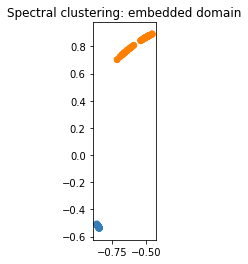

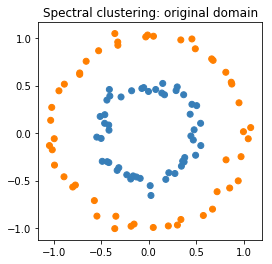

In [7]:
# Finally, do clustering on reduced space using KMeans:
km2 = KMeans(n_clusters=2, n_init=20)
km2.fit(LX)
y_pred = km2.labels_
#y_pred = [1 if x > 0 else 0 for x in LX]

# plot results
plot_results(LX, y_pred, 3, "Spectral clustering: embedded domain")
plot_results(X, y_pred, 3, "Spectral clustering: original domain")